# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [31]:
import pandas as pd
ames = pd.read_csv("data/ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [32]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [33]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

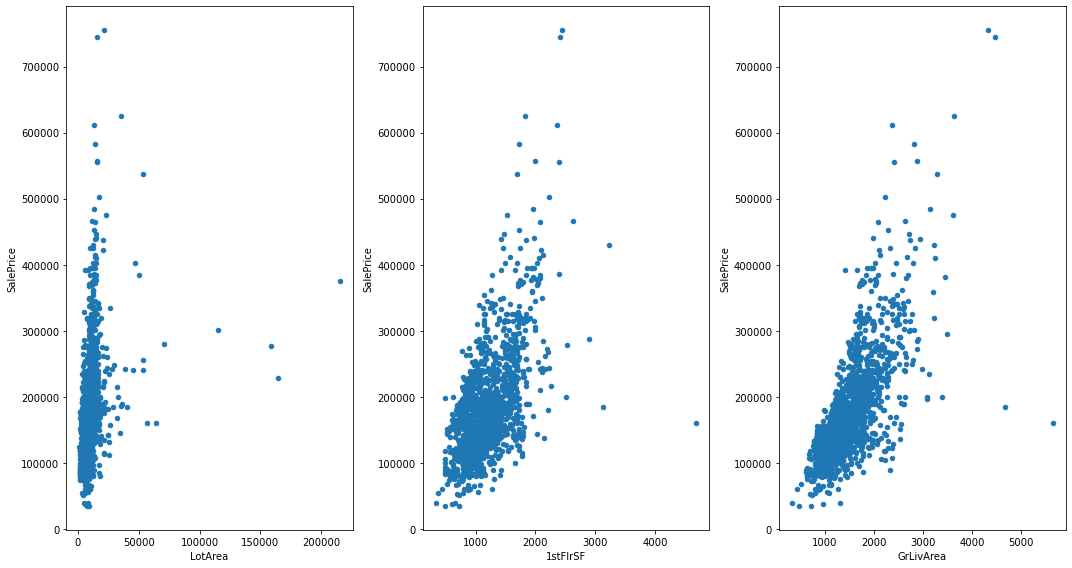

In [34]:
# Your code here - import relevant library, create scatter plots
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8),ncols=3)
ames_subset.plot.scatter(x='LotArea',y='SalePrice',ax=ax[0])
ames_subset.plot.scatter(x='1stFlrSF',y='SalePrice',ax=ax[1])
ames_subset.plot.scatter(x='GrLivArea',y='SalePrice',ax=ax[2])
plt.tight_layout();

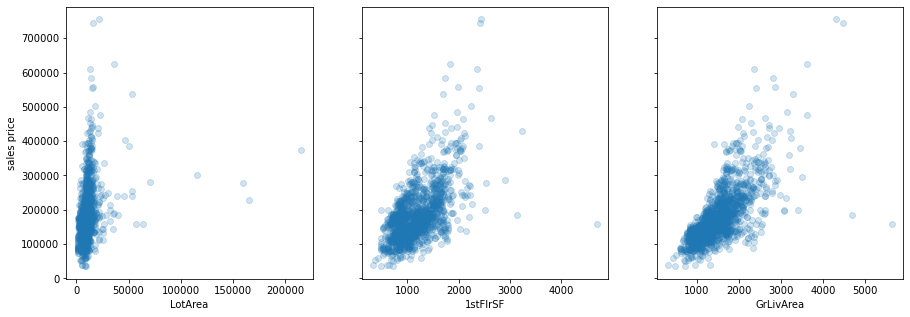

In [35]:
#teachers code
fig, axes = plt.subplots(ncols=3,figsize=(15,5),sharey=True)
axes[0].set_ylabel('sales price')

for i,col in enumerate(ames_subset.drop('SalePrice',axis=1).columns):
    ax = axes[i]
    ax.scatter(ames_subset[col],ames_subset['SalePrice'],alpha=0.2)
    ax.set_xlabel(col)

In [36]:
# Your written answer here - do these seem like good candidates for linear regression?
'''
All three of them seem to have a linear relationship with SalePrice
1stFlrSF seems to have the most variance vs. SalePrice
All three have a few outliers that could potentially skew the results
'''

'\nAll three of them seem to have a linear relationship with SalePrice\n1stFlrSF seems to have the most variance vs. SalePrice\nAll three have a few outliers that could potentially skew the results\n'

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [37]:
## Explore correlation to find a good starting point
ames_subset.corr()['SalePrice']

LotArea      0.263843
1stFlrSF     0.605852
GrLivArea    0.708624
SalePrice    1.000000
Name: SalePrice, dtype: float64

In [38]:
# Your code here - define y and baseline X
y = ames_subset['SalePrice']
# Above grade living area had the highest correlation
X_baseline = ames_subset[['GrLivArea']]

In [39]:
# Your code here - import StatsModels, fit baseline model, display results
import statsmodels.api  as sm
baseline_model = sm.OLS(y,sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
baseline_results.summary()

c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sat, 30 Nov 2024   Prob (F-statistic):          4.52e-223
Time:                        21:21:32   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# Your written answer here - interpret model results
'''
Our model is statistically significant overall, and explains abt 50% of the variance
in saleprice
Both our intercept and coeffient for GrLivarea are statistically significant

Our intercept is abput 18,600 meaning that a home with 0 square feet of above-ground
living area would cost about $18.6k

Our coefficent for GrLivArea is about 107, meaning that for each additional square foot
of above ground living area, we expect the price to increase about $107
''' 

'\nOur model is statistically significant overall, and explains abt 50% of the variance\nin saleprice\nBoth our intercept and coeffient for GrLivarea are statistically significant\n\nOur intercept is abput 18,600 meaning that a home with 0 square feet of above-ground\nliving area would cost about $18.6k\n\nOur coefficent for GrLivArea is about 107, meaning that for each additional square foot\nof above ground living area, we expect the price to increase about $107\n'

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [41]:
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


In [42]:
# Your code here - define X
X = ames_subset[['LotArea','1stFlrSF','GrLivArea']]
#Teachers code
X = ames_subset.drop(columns='SalePrice',axis=1)

In [44]:
# Your code here - fit model and display results
subset_model = sm.OLS(y,sm.add_constant(X))
subset_results = subset_model.fit()
subset_results.summary()

c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Sat, 30 Nov 2024   Prob (F-statistic):          1.57e-262
Time:                        21:22:57   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.003   -2.37e+04   -4944.183
LotArea        0.2841      0.145      1.956      0.051      -0.001       0.569
1stFlrSF      60.2866      4.388     13.739      0.000      51.679      68.894
GrLivArea     80.6061      3.193     25.248      0.000      74.344      86.869
==============================================================================
Omnibus:                      399.604   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13445.161
Skew:                          -0.588   Prob(JB):                         0.00
Kurtosis:                      17.820   Cond. No.                     5.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Your written answer here - interpret model results. Does this model seem better than the previous one?
'''
Our model is statistically significant overall, and explains about 57% of the variance in Saleproce.
This us about 7% more variace explained than the simple model

using an alpha of 0.05,our intercept and coefficients for 1stFlrSF and GrLivArea are statisctically significant, but
not our coefficent for lotArea.

Both our intercept and coeeficent for GrLivArea are statiscticaly significant

so we have an improvement in terms of variance explained (R-squared) but also some values are not statisctally significant.It depends on the use case  
whether this model would be considered better
'''


## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

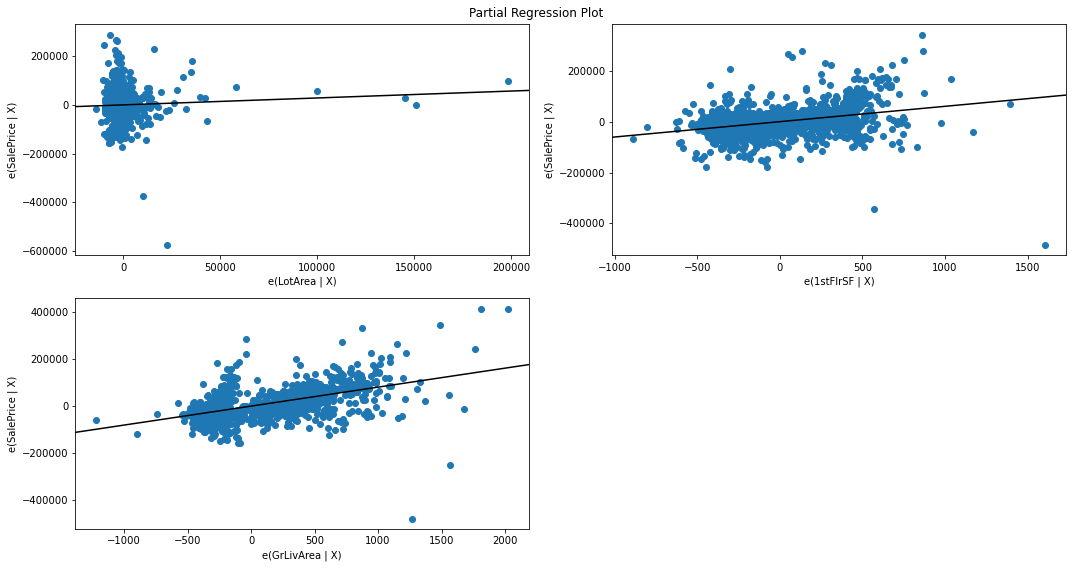

In [49]:
# Your code here - create partial regression plots for each predictor
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(subset_results,list(X.columns),fig=fig);

In [ ]:
# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?
'''
In the context of a multiple regression model,LotAre seems to be much weaker predictor than it initially seemed.
The partial regression plot is showing only the variance in Salesprice that is not explained by the other variables

1stFlrSF and GrLivArea look roughly the same as they did as standalone scatter plots,although the slopes are
not as steep

Thinking back to the meaning of these variables, you might have guessed that
1stFlrSF and GrLivArea would have more overlap in the variance they explain, since
they are both related to the square footage of the house. However it seems that
they actually contain different enough information.

You also might notice that the outliers in LotArea might be having more of an impact
than anticipated. That best-fit line might not be where you intuitively would have
drawn it.
'''

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [ ]:
# Your code here - import linear regression from scikit-learn and create and fit model
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression()
sklearn_results = sklearn_model.fit(X=X,y=y)

In [70]:
# Your code here - compare R-Squared
def print_results(sk_model,ols_model):
    print(f'''
          statsmodel rquared {ols_model.rsquared}
          sklearn rsquared {sk_model.score(X,y)}

          statsmodel intecept {ols_model.params['const']}
          sklearn intecept{sk_model.intercept_}

         statsmodel coef{ols_model.params}
         sklearn coef {sk_model.coef_}
''')

In [71]:
print_results(sklearn_results,subset_results)


          statsmodel rquared 0.5649801771384368
          sklearn rsquared 0.5649801771384368

          statsmodel intecept -14313.408857494283
          sklearn intecept-14313.408857494564

         statsmodel coefconst       -14313.408857
LotArea          0.284134
1stFlrSF        60.286646
GrLivArea       80.606058
dtype: float64
         sklearn coef [ 0.28413359 60.28664625 80.60605834]



In [73]:
subset_results.params.values

array([-1.43134089e+04,  2.84133589e-01,  6.02866463e+01,  8.06060583e+01])

In [ ]:
# Your code here - compare intercept and coefficients
print(sklearn_results.intercept_)#-14313.408857494564
sklearn_results.coef_

## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.